In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cond import CalculateProb
from draw import randomDraw
import random as rd

#PS, EA, MR
#read in csv of conditional matrix here. Conditional Matrix contains likelihood that ohter nodes will be infected given
#an initial condition that represents which nodes are already compromised. Initial condition(s) are in the csv.
conditional  =  pd.read_csv("net1.csv")

#seperate out M, the probability matrix, and N the Node matrix
numCol = len(conditional.columns)
M = np.array(conditional.iloc[0:numCol])
N = np.array(conditional.iloc[numCol:numCol+1])
print(M)
print(N)
initN = N[0]
N = N[0]

[[0.   0.   0.7  0.   0.   0.  ]
 [0.2  0.   0.6  0.   0.   0.  ]
 [0.   0.   0.   0.8  0.5  0.1 ]
 [0.   0.   0.   0.   0.   0.66]
 [0.   0.   0.   0.   0.   0.66]
 [0.   0.   0.   0.   0.   0.  ]]
[[1. 1. 0. 0. 0. 0.]]


In [202]:
#Create a list of nodes that the User wants to watch for compromise. 
#This list will determine how long the simulation will run. 
Watch = [1, 1, 0, 1, 1, 1]
# Checks to see if the nodes in watch are compromised or not. Returns a boolean.

def isCompromised():
    count = 0
    watch_ones = np.where(np.array(Watch) == 1)
    N_ones = np.where(np.array(N) == 1)
    return set(watch_ones[0]).issubset(set(N_ones[0]))

In [229]:
n = 1000000 # Number of iterations
num_steps = []
for i in range(n):
    #print("Interation: ", i)
    N = initN
    count = 0
    while(not isCompromised()):
        p = CalculateProb(M,N)
        for j in range(len(p)):
            if(N[j] != 1):
                N[j] = p[j]
        #print("Next Step Prob:", p)
        N = randomDraw(N)
        count = count + 1
    num_steps.append(count)
    #print("Number of Steps Taken: ", num_steps[len(num_steps)-1])
    #print("N vector: ", N)
    #print("")
#print("Number of Steps Taken: ", num_steps)

(array([2.24321111e-01, 4.15080000e-01, 2.55618889e-01, 1.16663333e-01,
        5.24866667e-02, 2.40300000e-02, 1.16311111e-02, 5.68555556e-03,
        2.80111111e-03, 0.00000000e+00, 1.43444444e-03, 6.66666667e-04,
        3.54444444e-04, 1.82222222e-04, 7.77777778e-05, 3.88888889e-05,
        2.00000000e-05, 1.44444444e-05, 2.22222222e-06, 2.22222222e-06]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ,
        10.9, 11.8, 12.7, 13.6, 14.5, 15.4, 16.3, 17.2, 18.1, 19. ]),
 <a list of 20 Patch objects>)

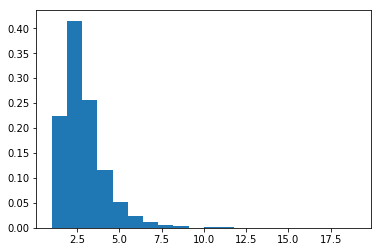

In [233]:
len(num_steps)
plt.hist(num_steps, density=True, bins = 20)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cond import CalculateProb
from draw import randomDraw
import random as rd
from generator import gen_network
from generator import gen_states
from generator import watch


#PS, EA, MR
#read in csv of conditional matrix here. Conditional Matrix contains likelihood that ohter nodes will be infected given
#an initial condition that represents which nodes are already compromised. Initial condition(s) are in the csv.
conditional  =  pd.read_csv("net1.csv")
size = 100
#seperate out M, the probability matrix, and N the Node matrix
numCol = len(conditional.columns)
M = gen_network(size)
N = gen_states(size)
print(M)
print(N)
initN = N




#Create a list of nodes that the User wants to watch for compromise. 
#This list will determine how long the simulation will run. 
Watch = watch(size)
print("Watch Vector:", Watch)
# Checks to see if the nodes in watch are compromised or not. Returns a boolean.
def isCompromised():
    count = 0
    watch_ones = np.where(np.array(Watch) == 1)
    N_ones = np.where(np.array(N) == 1)
    return set(watch_ones[0]).issubset(set(N_ones[0]))


n = 10 # Number of iterations
num_steps = []
for i in range(n):
    #print("Interation: ", i)
    N = initN
    count = 0
    while(not isCompromised()):
        p = CalculateProb(M,N)
        for j in range(len(p)):
            if(N[j] != 1):
                N[j] = p[j]
        #print("Next Step Prob:", p)
        N = randomDraw(N)
        count = count + 1
    num_steps.append(count)
    #print("Number of Steps Taken: ", num_steps[len(num_steps)-1])
    #print("N vector: ", N)
    #print("")
print("Number of Steps Taken: ", num_steps)

[[0.   0.89 0.75 ... 0.   0.   0.  ]
 [0.   0.   0.78 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.12 0.58]
 [0.   0.   0.   ... 0.   0.   0.44]
 [0.   0.   0.   ... 0.   0.   0.  ]]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Watch Vector: [1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0]
Number of Steps Taken:  [46, 41, 41, 45, 43, 37, 42, 35, 38, 32]
